# AI Assignment 9

# Excercise 1)
### Visualize the data

Domain of flower species

In [28]:
import pandas as pd

# Load the dataset
data = pd.read_csv('irisdata.csv')

# Display unique species names
unique_species = data['species'].unique()
print("Unique species in the dataset:", unique_species)


Unique species in the dataset: ['setosa' 'versicolor' 'virginica']


## Excercise 1a)

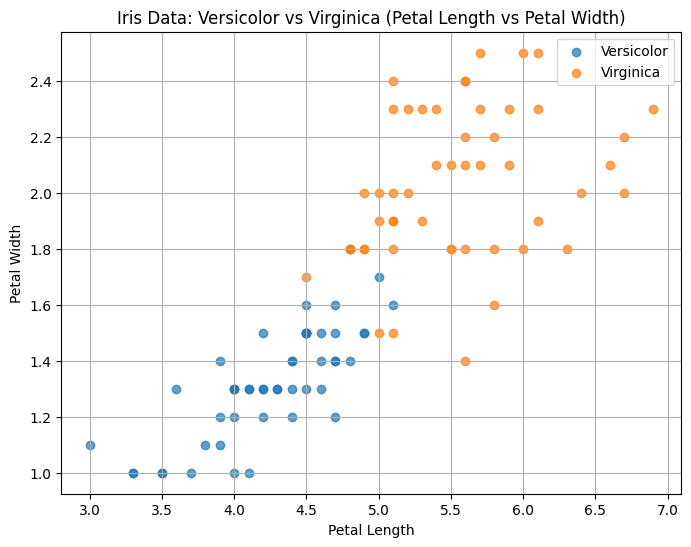

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('irisdata.csv')

# Filter classes 2 and 3 (Versicolor and Virginica)
class_2 = data[data['species'] == 'versicolor']
class_3 = data[data['species'] == 'virginica']

# Extract petal length and width for the two classes
petal_length_class_2 = class_2['petal_length']
petal_width_class_2 = class_2['petal_width']
petal_length_class_3 = class_3['petal_length']
petal_width_class_3 = class_3['petal_width']

# Plot the two classes
plt.figure(figsize=(8, 6))
plt.scatter(petal_length_class_2, petal_width_class_2, label='Versicolor', alpha=0.7)
plt.scatter(petal_length_class_3, petal_width_class_3, label='Virginica', alpha=0.7)

# Add plot details
plt.title('Iris Data: Versicolor vs Virginica (Petal Length vs Petal Width)')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


## Excercise 1b) and 1c)

### Concept
A one-layer neural network computes its output using a **sigmoid activation function**, which maps the input to a value between 0 and 1. This is useful for binary classification tasks.

### Equation
The output of the network is:

$$
\hat{y} = \sigma(w \cdot x + b) \sigma(z) = \frac{1}{1 + e^{-z}}
$$

Where:
- \( x \): Input feature vector.
- \( w \): Weight vector.
- \( b \): Bias term.
- ( $\sigma(z)$ ): Sigmoid activation function.

### Context
This is used to classify data points (e.g., petal measurements of Iris species) into one of two classes by modeling the decision boundary as a smooth probabilistic function.


Input features (first 5 rows):
[[0.43589744 0.26666667]
 [0.38461538 0.33333333]
 [0.48717949 0.33333333]
 [0.25641026 0.2       ]
 [0.41025641 0.33333333]]

True labels (first 5 rows):
[0 0 0 0 0]

Neural network outputs (first 5 rows):
[0.57381558 0.57004905 0.54475172 0.63264709 0.56375365]


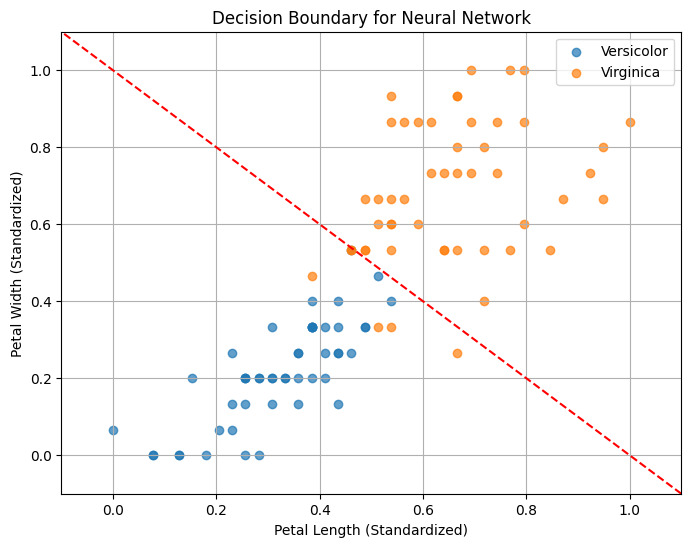

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the Iris dataset
data = pd.read_csv('irisdata.csv')

# Filter for two species: Versicolor (0) and Virginica (1)
data = data[data['species'].isin(['versicolor', 'virginica'])]  # Select two classes
data['label'] = data['species'].apply(lambda x: 0 if x == 'versicolor' else 1)  # Map species to 0 and 1

# Extract features (petal_length, petal_width) and labels
X_raw = data[['petal_length', 'petal_width']].values  # Feature matrix
y = data['label'].values  # Class labels

# Standardize features to (0, 1) range
X_min = X_raw.min(axis=0)
X_max = X_raw.max(axis=0)
X = (X_raw - X_min) / (X_max - X_min)

# Define the sigmoid function
def sigmoid(z):
    """
    Applies the sigmoid function element-wise.
    """
    return 1 / (1 + np.exp(-z))

# Define the one-layer neural network output function
def neural_network_output(X, w, b):
    """
    Computes the output of a one-layer neural network with sigmoid activation.

    Parameters:
    - X: Input feature matrix (2D NumPy array with shape [n_samples, n_features])
    - w: Weight vector (1D NumPy array with shape [n_features])
    - b: Bias term (scalar)

    Returns:
    - y_hat: Predicted outputs (1D NumPy array with shape [n_samples])
    """
    z = np.dot(X, w) + b  # Compute the weighted sum
    return sigmoid(z)  # Apply sigmoid activation

# Initialize weights and bias
w = np.array([-1.0, -1.0])  # Example weights for petal_length and petal_width
b = 1  # Example bias

# Compute the network output
outputs = neural_network_output(X, w, b)

# Print results for the first 5 data points
print("Input features (first 5 rows):")
print(X[:5])
print("\nTrue labels (first 5 rows):")
print(y[:5])
print("\nNeural network outputs (first 5 rows):")
print(outputs[:5])

# Plot the dataset and decision boundary
def plot_decision_boundary(X, y, w, b):
    """
    Plots the data points and the decision boundary for the neural network.

    Parameters:
    - X: Feature matrix
    - y: Labels
    - w: Weights
    - b: Bias
    """
    plt.figure(figsize=(8, 6))
    
    # Scatter plot of the data
    plt.scatter(X[y == 0, 0], X[y == 0, 1], label='Versicolor', alpha=0.7)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], label='Virginica', alpha=0.7)

    # Define the grid for the decision boundary
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    grid = np.c_[xx.ravel(), yy.ravel()]
    
    # Compute the network output for the grid points
    grid_outputs = neural_network_output(grid, w, b).reshape(xx.shape)
    
    # Plot the decision boundary (where output = 0.5)
    plt.contour(xx, yy, grid_outputs, levels=[0.5], colors='red', linestyles='--')

    # Add plot details
    plt.title('Decision Boundary for Neural Network')
    plt.xlabel('Petal Length (Standardized)')
    plt.ylabel('Petal Width (Standardized)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot the decision boundary
plot_decision_boundary(X, y, w, b)




## Excercise 1d) 
### Neural Network plotted against the input space

We can clearly see that the width and length are a direct factor in determining which flower is in which class between Versicolor and Virginica.

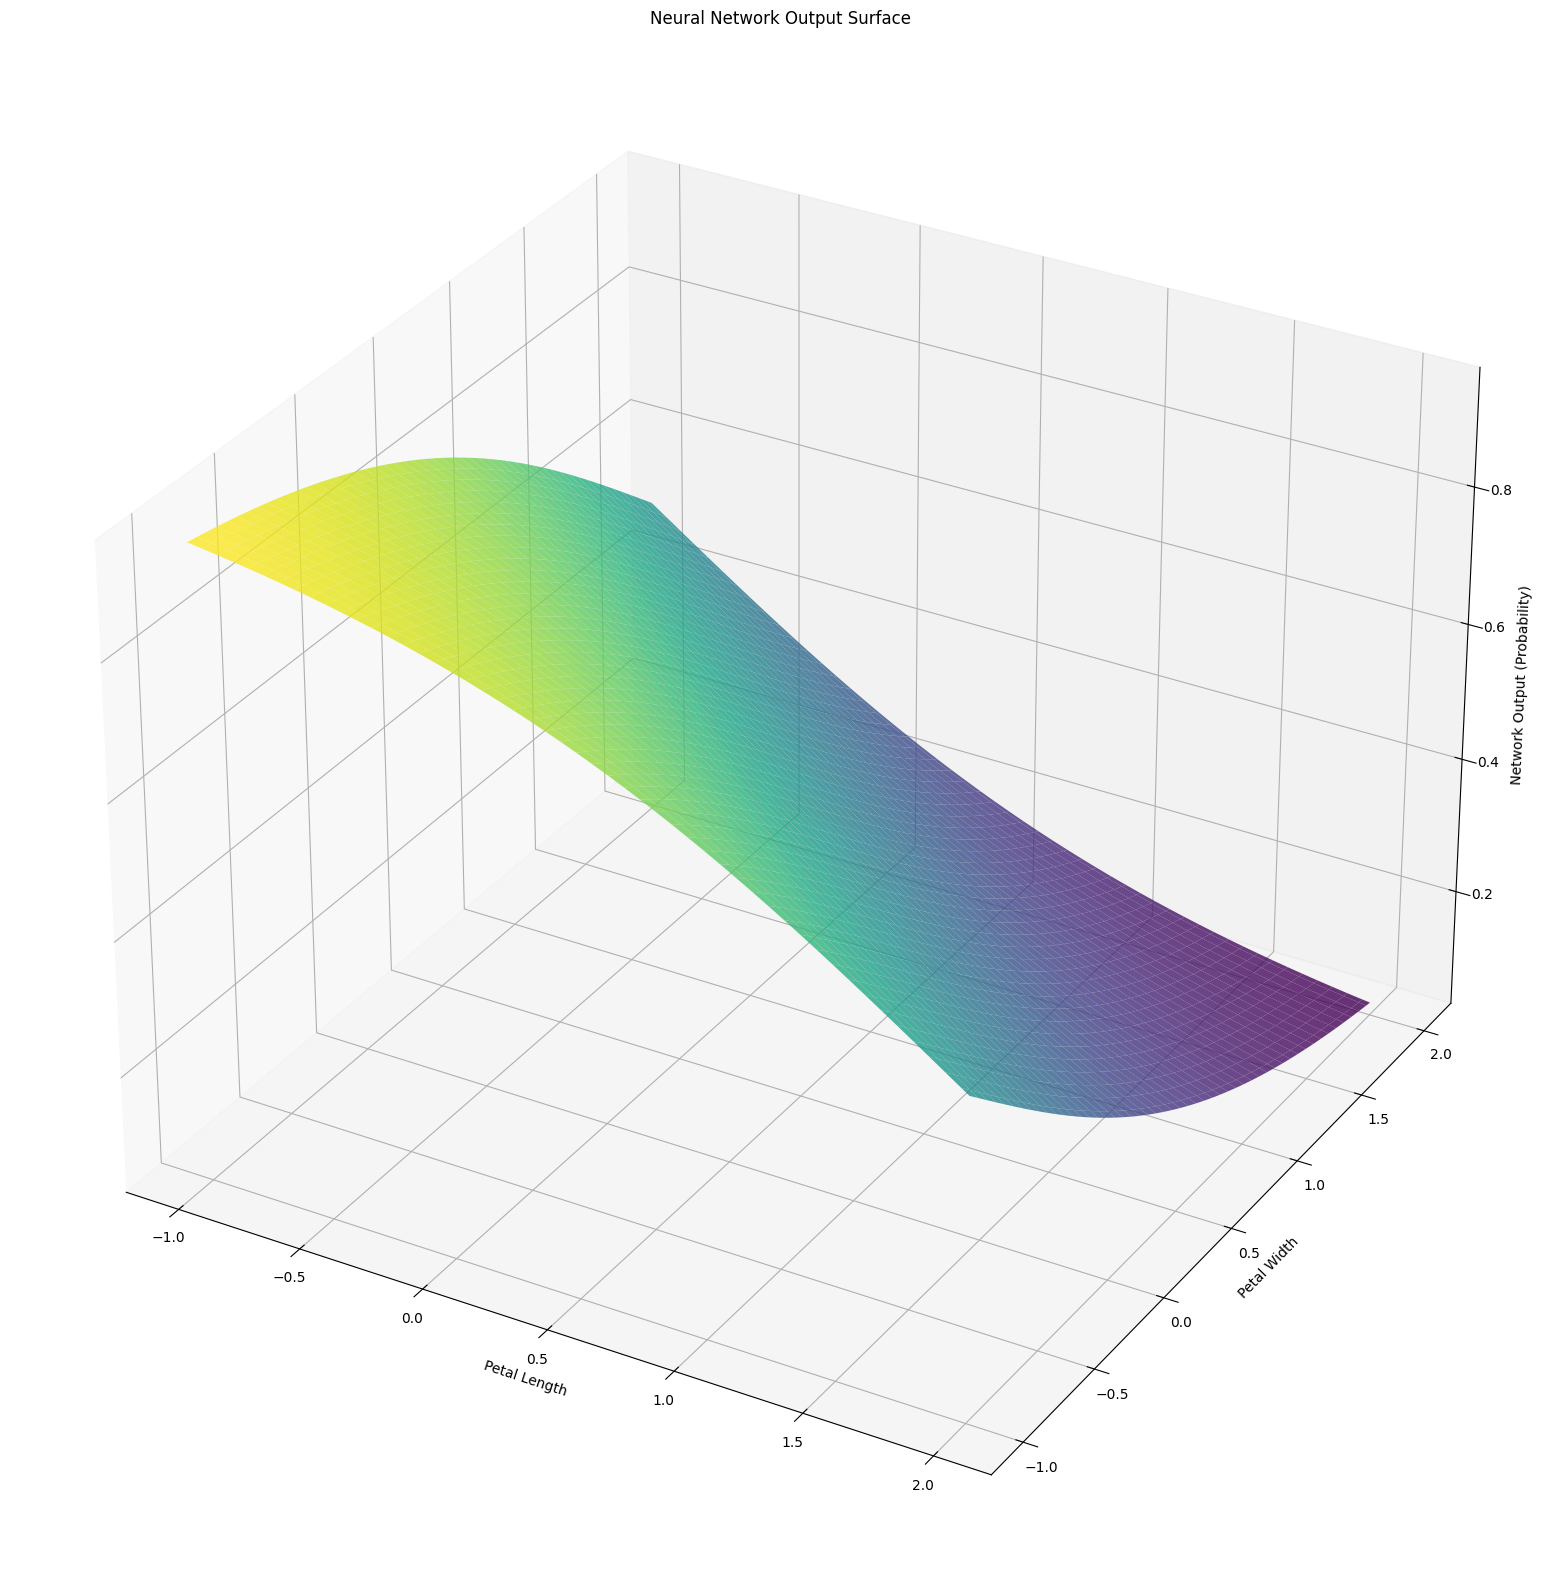

In [31]:
from mpl_toolkits.mplot3d import Axes3D

def plot_surface(X, w, b):
    """
    Plots the 3D surface of the neural network output over the input space.
    
    Parameters:
    - X: Feature matrix
    - w: Weights
    - b: Bias
    """
    # Define the grid over the input space
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    grid = np.c_[xx.ravel(), yy.ravel()]
    
    # Compute neural network outputs for the grid
    grid_outputs = neural_network_output(grid, w, b).reshape(xx.shape)
    
    # Create a 3D plot
    fig = plt.figure(figsize=(20, 20))
    ax = fig.add_subplot(111, projection='3d')
    
    # Plot the surface
    ax.plot_surface(xx, yy, grid_outputs, cmap='viridis', alpha=0.8)
    
    # Add labels and title
    ax.set_title('Neural Network Output Surface')
    ax.set_xlabel('Petal Length')
    ax.set_ylabel('Petal Width')
    ax.set_zlabel('Network Output (Probability)')
    
    plt.show()

# Call the function
plot_surface(X, w, b)


## Excercise 1e)
Testing against Ambiguous and Boundary inputs. Boundaries were a bit of a problem.

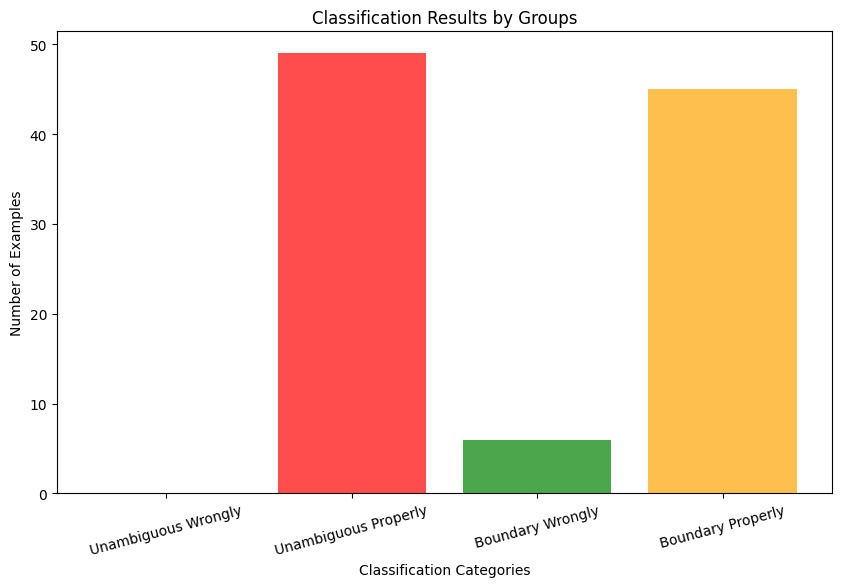

In [33]:
# Threshold for binary classification
threshold = 0.5
predicted_labels = (outputs >= threshold).astype(int)

# Unambiguous and boundary indices
unambiguous_indices = np.where((outputs < 0.4) | (outputs > 0.6))[0]
boundary_indices = np.where((outputs >= 0.4) & (outputs <= 0.6))[0]

# Properly and misclassified within unambiguous examples
unambiguous_properly = np.intersect1d(
    unambiguous_indices, np.where(predicted_labels == y)[0]
)
unambiguous_wrongly = np.intersect1d(
    unambiguous_indices, np.where(predicted_labels != y)[0]
)

# Properly and misclassified within boundary examples
boundary_properly = np.intersect1d(
    boundary_indices, np.where(predicted_labels == y)[0]
)
boundary_wrongly = np.intersect1d(
    boundary_indices, np.where(predicted_labels != y)[0]
)

# Count each category
categories = [
    "Unambiguous Wrongly",
    "Unambiguous Properly",
    "Boundary Wrongly",
    "Boundary Properly",
]
counts = [
    len(unambiguous_properly),
    len(unambiguous_wrongly),
    len(boundary_properly),
    len(boundary_wrongly),
]

# Plotting the results
plt.figure(figsize=(10, 6))
plt.bar(categories, counts, color=["blue", "red", "green", "orange"], alpha=0.7)
plt.title("Classification Results by Groups")
plt.ylabel("Number of Examples")
plt.xlabel("Classification Categories")
plt.xticks(rotation=15)
plt.show()


# Excercise 2

## Excercise 2a)


### Mean Squared Error 
The Mean Squared Error (MSE) is a metric used to evaluate the performance of a model by measuring the average squared difference between the predicted outputs $\hat{y}$ and the true labels $y$.

$$
 MSE = \frac{1}{n} \sum_{i=1}^{n}(y_i-\hat{y}_i)^2
$$

MSE provides a single scalar value to assess the performance of the model.
A smaller MSE indicates better alignment between predictions $\hat{y}$ and true values $y$.

In [34]:
def compute_mse(X, w, b, y):
    """
    Computes the Mean Squared Error (MSE) for a single-layer neural network.

    Parameters:
    - X: Feature matrix (numpy array of shape [n_samples, n_features]).
    - w: Weight vector (numpy array of shape [n_features]).
    - b: Bias term (scalar).
    - y: True labels (numpy array of shape [n_samples]).

    Returns:
    - mse: Mean Squared Error (scalar).
    """
    # Compute predicted outputs using the neural network
    y_pred = neural_network_output(X, w, b)
    
    # Calculate Mean Squared Error
    mse = np.mean((y - y_pred) ** 2)
    
    return mse


## Excercise 2b)

MSE for poor decision boundary (w1, b1): 0.4586085051536283
MSE for better decision boundary (w2, b2): 0.3600193905549286

Decision Boundary for Poor Weights and Bias:


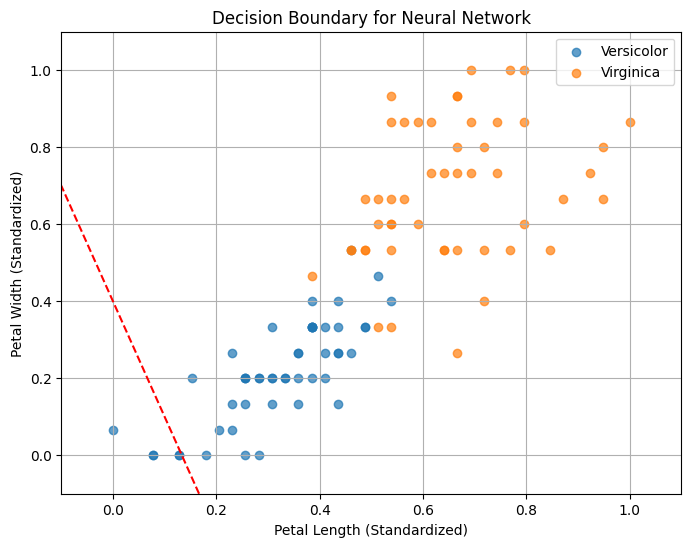


Decision Boundary for Better Weights and Bias:


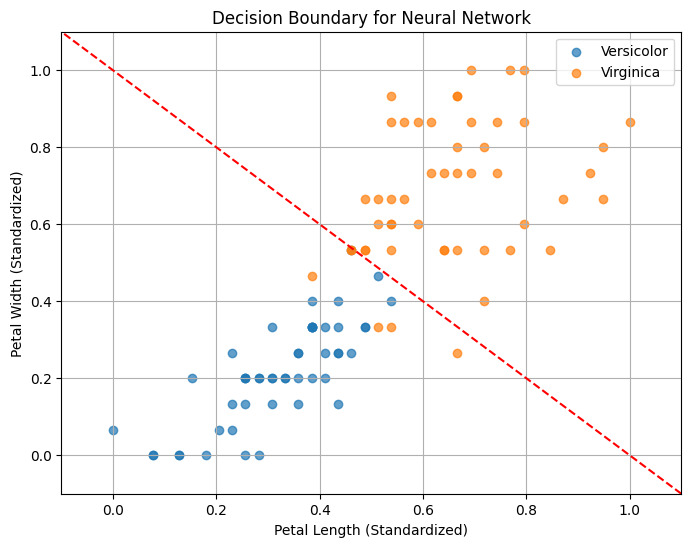

In [36]:
# Define two sets of weights and biases
w1 = np.array([-3.0, -1.0])  # improper weights 
b1 = 0.4  # inaccurate bias

w2 = np.array([-1.0, -1.0])  # Proper weights 
b2 = 1.0  # Accurate bias

# Compute MSE for both sets of weights and bias
mse1 = compute_mse(X, w1, b1, y)
mse2 = compute_mse(X, w2, b2, y)

# Print the MSE values
print("MSE for poor decision boundary (w1, b1):", mse1)
print("MSE for better decision boundary (w2, b2):", mse2)

# Plot the decision boundary for poor weights
print("\nDecision Boundary for Poor Weights and Bias:")
plot_decision_boundary(X, y, w1, b1)

# Plot the decision boundary for better weights
print("\nDecision Boundary for Better Weights and Bias:")
plot_decision_boundary(X, y, w2, b2)


## Excercise 2c)
### Gradient of the Object Function with respect to the Neural Network Weights
`gradient` of a function gives the direction and rate of the steepest ascent.
`objective function` quantifies the error or loss of a model's predictions compared to true labels in this case it is equivalent to `MSE`


Decision Boundary Before Gradient Update:


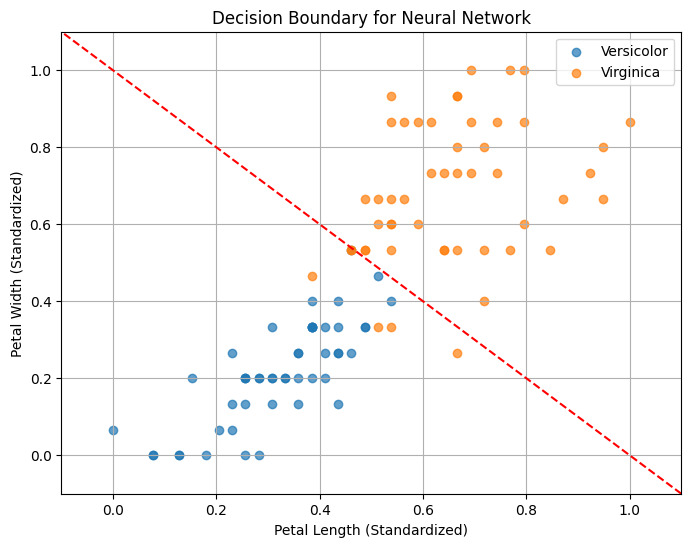


Decision Boundary After Gradient Update:


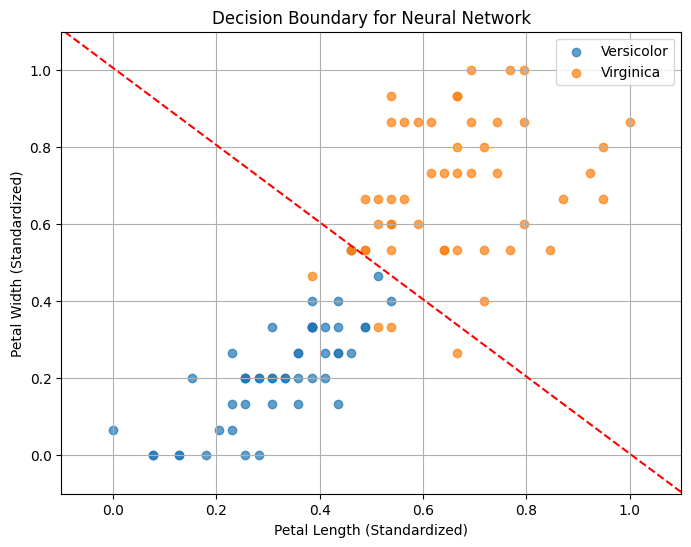

In [38]:
def compute_gradients(X, y, w, b):
    """
    Computes the gradients of the MSE with respect to weights and bias.

    Parameters:
    - X: Feature matrix (numpy array of shape [n_samples, n_features]).
    - y: True labels (numpy array of shape [n_samples]).
    - w: Current weights (numpy array of shape [n_features]).
    - b: Current bias (scalar).

    Returns:
    - grad_w: Gradient of MSE with respect to weights (numpy array of shape [n_features]).
    - grad_b: Gradient of MSE with respect to bias (scalar).
    """
    n = X.shape[0]  # Number of samples
    y_pred = neural_network_output(X, w, b)  # Predicted outputs
    
    # Compute gradients
    error = y - y_pred
    grad_w = -2 / n * np.dot((error * y_pred * (1 - y_pred)), X)  # Gradient w.r.t. weights
    grad_b = -2 / n * np.sum(error * y_pred * (1 - y_pred))       # Gradient w.r.t. bias
    
    return grad_w, grad_b


def update_parameters(w, b, grad_w, grad_b, step_size):
    """
    Updates the weights and bias using the gradients and a small step size.

    Parameters:
    - w: Current weights (numpy array of shape [n_features]).
    - b: Current bias (scalar).
    - grad_w: Gradient of MSE with respect to weights (numpy array of shape [n_features]).
    - grad_b: Gradient of MSE with respect to bias (scalar).
    - step_size: Learning rate (scalar).

    Returns:
    - new_w: Updated weights (numpy array of shape [n_features]).
    - new_b: Updated bias (scalar).
    """
    new_w = w - step_size * grad_w
    new_b = b - step_size * grad_b
    return new_w, new_b


# Initial parameters
w = np.array([-1.0, -1.0])  # Example weights
b = 1.0                    # Example bias
step_size = 0.1            # Small step size for visualization

# Compute gradients
grad_w, grad_b = compute_gradients(X, y, w, b)

# Update parameters
updated_w, updated_b = update_parameters(w, b, grad_w, grad_b, step_size)

# Visualize decision boundaries before and after the update
print("\nDecision Boundary Before Gradient Update:")
plot_decision_boundary(X, y, w, b)

print("\nDecision Boundary After Gradient Update:")
plot_decision_boundary(X, y, updated_w, updated_b)


# Excercise 3)

## Excercise 3a)
### Optimized Decisioin Boundary with Gradient Descent

In [39]:
def gradient_descent(X, y, w_init, b_init, step_size, max_iters, tolerance):
    """
    Performs gradient descent to optimize weights and bias for minimizing MSE.

    Parameters:
    - X: Feature matrix (numpy array of shape [n_samples, n_features]).
    - y: True labels (numpy array of shape [n_samples]).
    - w_init: Initial weights (numpy array of shape [n_features]).
    - b_init: Initial bias (scalar).
    - step_size: Learning rate (scalar).
    - max_iters: Maximum number of iterations (integer).
    - tolerance: Threshold for gradient magnitude to stop optimization.

    Returns:
    - w: Optimized weights (numpy array of shape [n_features]).
    - b: Optimized bias (scalar).
    - mse_history: List of MSE values at each iteration (for visualization).
    """
    w = w_init
    b = b_init
    mse_history = []  # Track MSE over iterations

    for iteration in range(max_iters):
        # Compute gradients
        grad_w, grad_b = compute_gradients(X, y, w, b)
        
        # Update weights and bias
        w, b = update_parameters(w, b, grad_w, grad_b, step_size)
        
        # Compute current MSE
        mse = compute_mse(X, w, b, y)
        mse_history.append(mse)
        
        # Check stopping condition (gradient magnitude)
        grad_magnitude = np.linalg.norm(grad_w) + abs(grad_b)
        if grad_magnitude < tolerance:
            print(f"Gradient descent converged at iteration {iteration}")
            break
    
    return w, b, mse_history


# Parameters for gradient descent
w_init = np.array([-1.0, -1.0])  # Initial weights
b_init = 1.0                    # Initial bias
step_size = 0.1                 # Learning rate
max_iters = 1000                # Maximum iterations
tolerance = 1e-6                # Stopping threshold for gradients

# Run gradient descent
optimized_w, optimized_b, mse_history = gradient_descent(X, y, w_init, b_init, step_size, max_iters, tolerance)

# Print final weights and bias
print("Optimized Weights:", optimized_w)
print("Optimized Bias:", optimized_b)

# Final MSE
print("Final MSE:", mse_history[-1])


Optimized Weights: [1.03763446 2.35459247]
Optimized Bias: -1.4515215649922746
Final MSE: 0.12229330467929463


## Excercise 3b)


Decision Boundary Before Optimization:


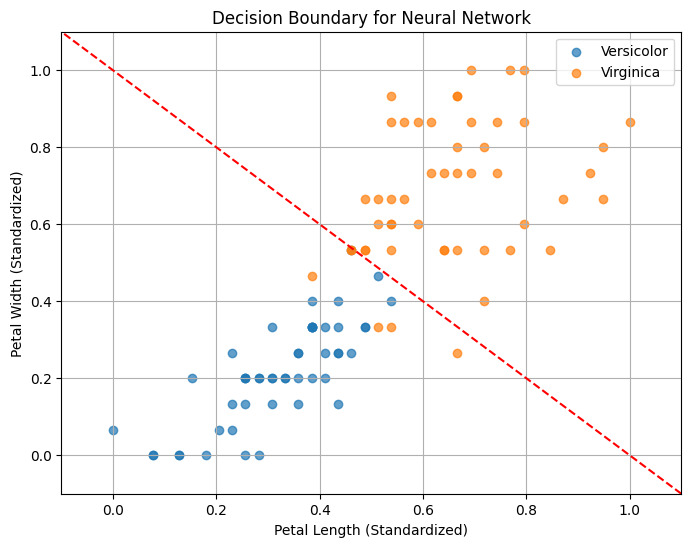


Decision Boundary at Iteration 0:


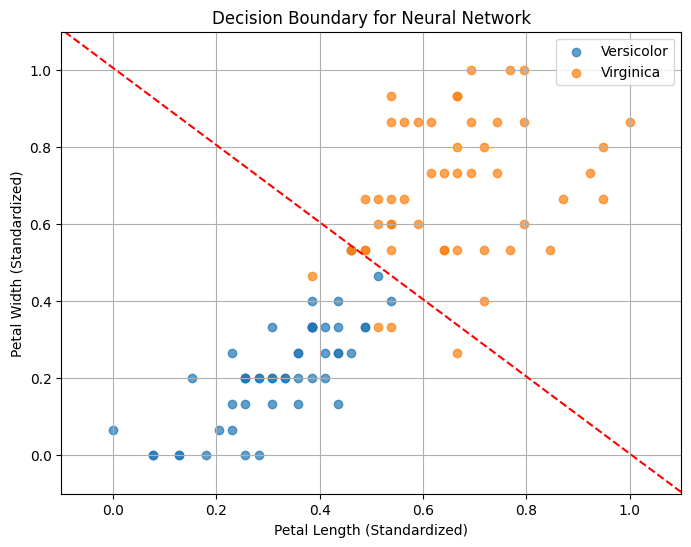


Decision Boundary at Iteration 10:


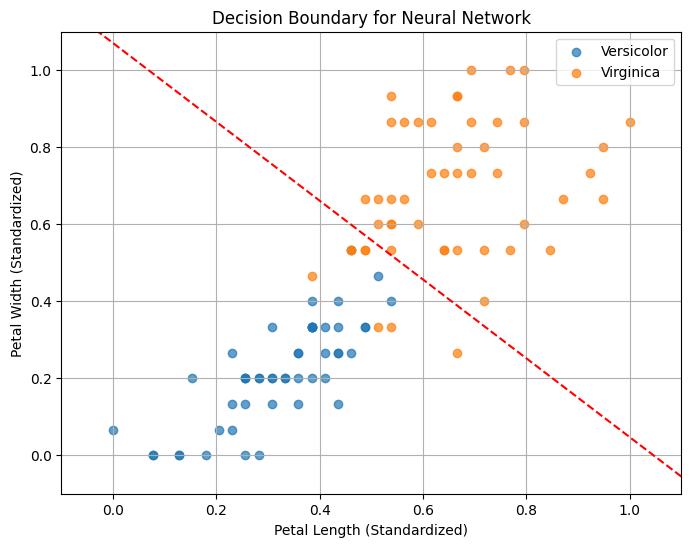


Decision Boundary at Iteration 50:


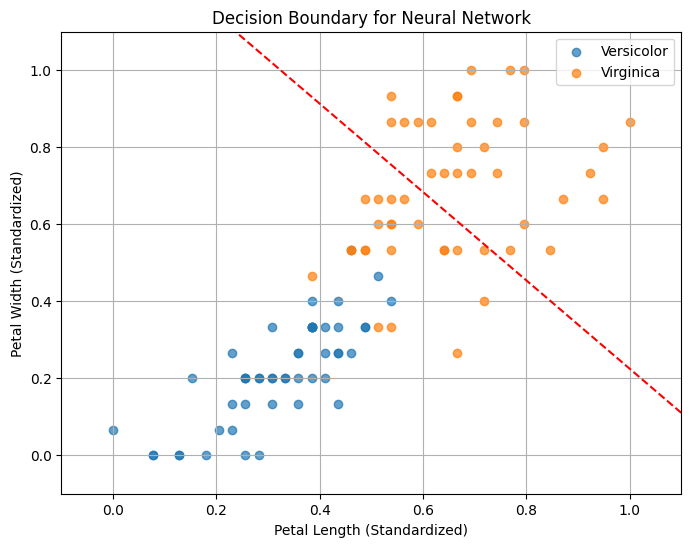


Decision Boundary After Optimization:


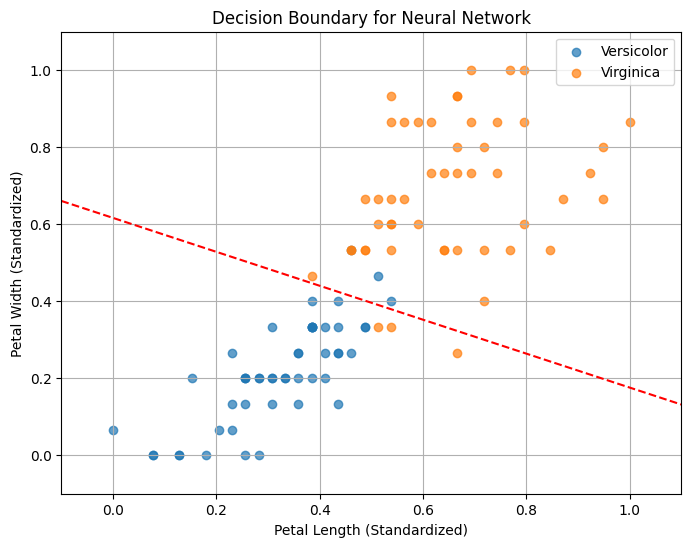

Optimized Weights: [1.03763446 2.35459247]
Optimized Bias: -1.4515215649922746
Final MSE: 0.12229330467929463


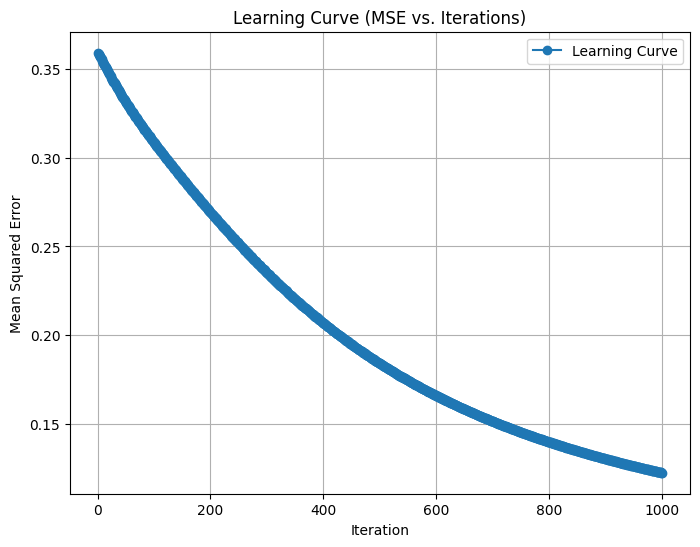

In [43]:
def gradient_descent_with_visualization(X, y, w_init, b_init, step_size, max_iters, tolerance, visualize_steps):
    """
    Performs gradient descent with visualization of decision boundaries and learning curve.

    Parameters:
    - X: Feature matrix (numpy array of shape [n_samples, n_features]).
    - y: True labels (numpy array of shape [n_samples]).
    - w_init: Initial weights (numpy array of shape [n_features]).
    - b_init: Initial bias (scalar).
    - step_size: Learning rate (scalar).
    - max_iters: Maximum number of iterations (integer).
    - tolerance: Threshold for gradient magnitude to stop optimization.
    - visualize_steps: List of iteration steps to visualize decision boundaries.

    Returns:
    - w: Optimized weights (numpy array of shape [n_features]).
    - b: Optimized bias (scalar).
    - mse_history: List of MSE values at each iteration (for visualization).
    """
    w = w_init
    b = b_init
    mse_history = []  # Track MSE over iterations

    # Visualize the initial decision boundary
    print("\nDecision Boundary Before Optimization:")
    plot_decision_boundary(X, y, w, b)

    for iteration in range(max_iters):
        # Compute gradients
        grad_w, grad_b = compute_gradients(X, y, w, b)
        
        # Update weights and bias
        w, b = update_parameters(w, b, grad_w, grad_b, step_size)
        
        # Compute current MSE
        mse = compute_mse(X, w, b, y)
        mse_history.append(mse)
        
        # Visualize decision boundary at specified steps
        if iteration in visualize_steps:
            print(f"\nDecision Boundary at Iteration {iteration}:")
            plot_decision_boundary(X, y, w, b)
        
        # Check stopping condition (gradient magnitude)
        grad_magnitude = np.linalg.norm(grad_w) + abs(grad_b)
        if grad_magnitude < tolerance:
            print(f"Gradient descent converged at iteration {iteration}")
            break
    
    # Visualize the final decision boundary
    print("\nDecision Boundary After Optimization:")
    plot_decision_boundary(X, y, w, b)

    return w, b, mse_history


# Parameters for gradient descent
w_init = np.array([-1.0, -1.0])  # Initial weights
b_init = 1.0                    # Initial bias
step_size = 0.1                 # Learning rate
max_iters = 1000                # Maximum iterations
tolerance = 1e-6                # Stopping threshold for gradients
visualize_steps = [0, 10, 50]   # Iterations at which to visualize the decision boundary

# Run gradient descent with visualization
optimized_w, optimized_b, mse_history = gradient_descent_with_visualization(
    X, y, w_init, b_init, step_size, max_iters, tolerance, visualize_steps
)

# Print final weights and bias
print("Optimized Weights:", optimized_w)
print("Optimized Bias:", optimized_b)

# Final MSE
print("Final MSE:", mse_history[-1])

# Plot the learning curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(mse_history) + 1), mse_history, marker='o', linestyle='-', label='Learning Curve')
plt.title('Learning Curve (MSE vs. Iterations)')
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.legend()
plt.show()



### Excercise 3c)
### Experiment Parameters

- Initial Weights (w_init): `[0.5, -0.5]`
- Initial Bias (b_init): `0.0`
- Step Sizes (Learning Rates): `[0.01, 0.1, 0.5]`
- Tolerances (Stopping Thresholds): `[1e-4, 1e-6]`
- Maximum Iterations (max_iters): `500`
- Visualization Steps: `[0, 10, 50]`




Running Gradient Descent with Step Size: 0.01, Tolerance: 0.0001

Decision Boundary Before Optimization:


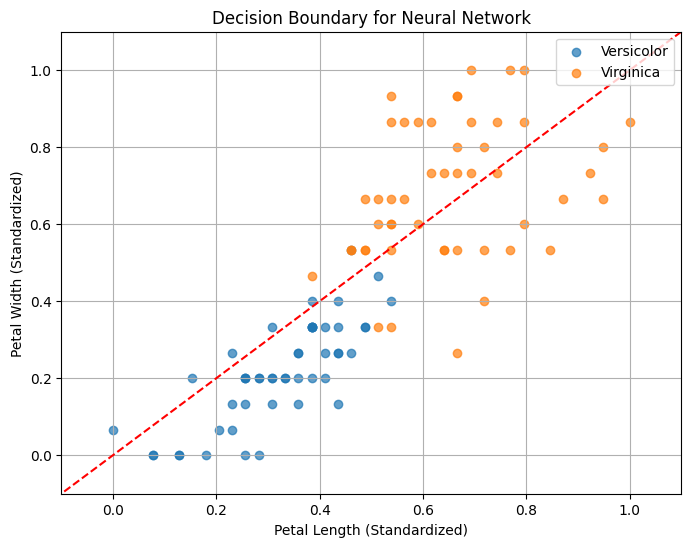


Decision Boundary at Iteration 0:


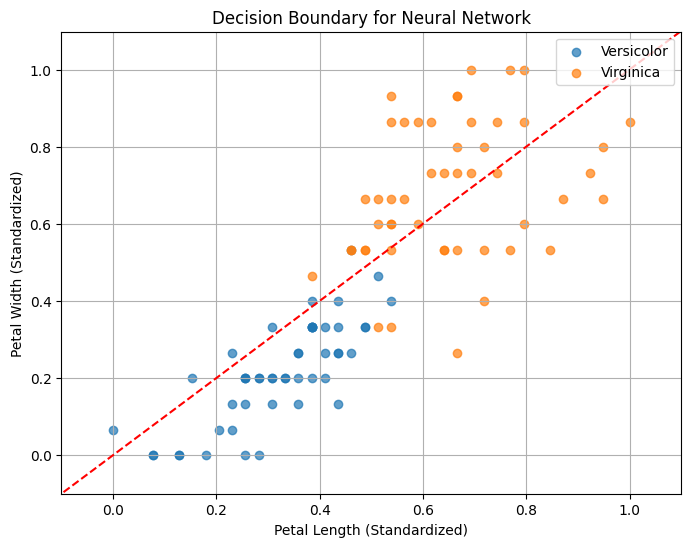


Decision Boundary at Iteration 10:


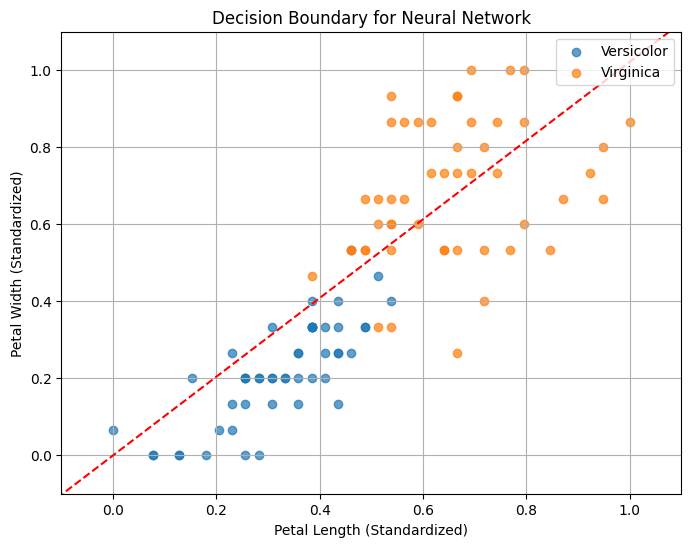


Decision Boundary at Iteration 50:


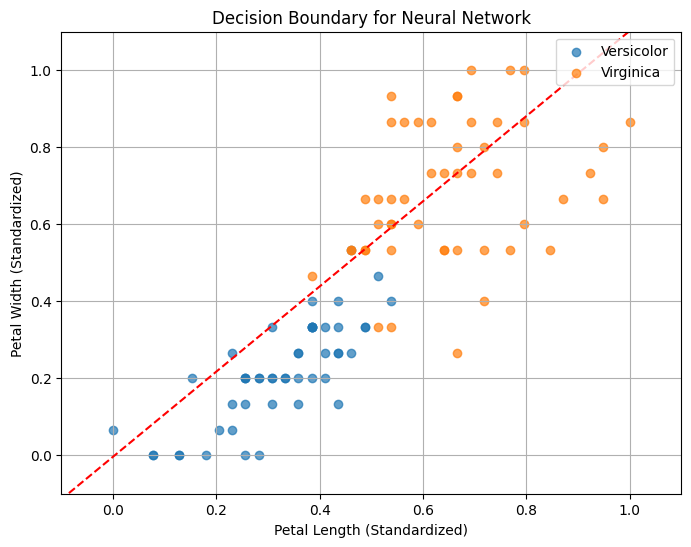


Decision Boundary After Optimization:


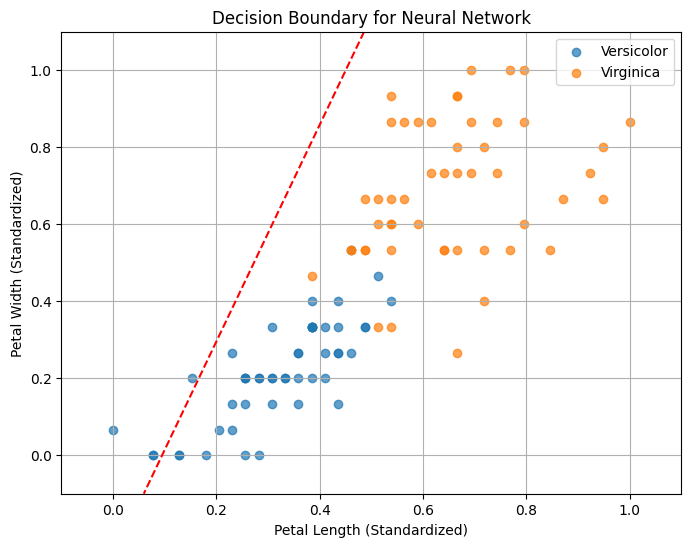

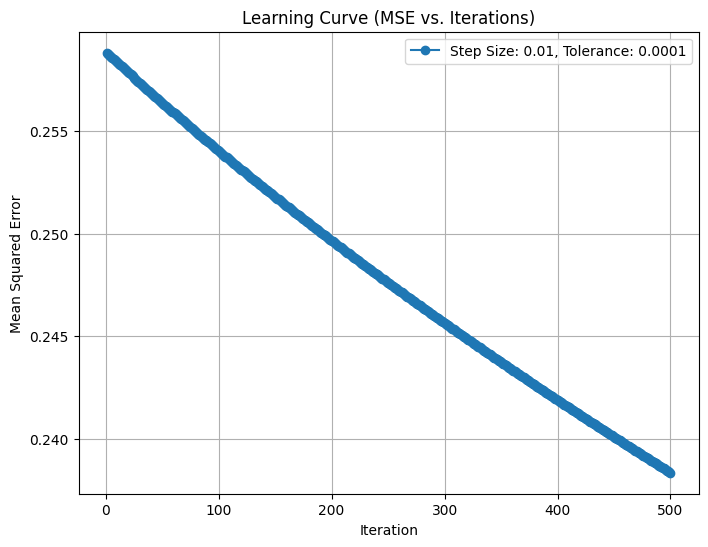


Running Gradient Descent with Step Size: 0.01, Tolerance: 1e-06

Decision Boundary Before Optimization:


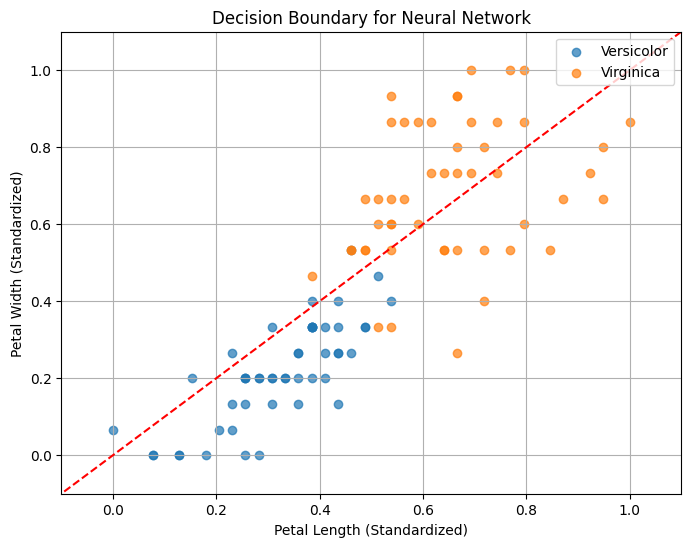


Decision Boundary at Iteration 0:


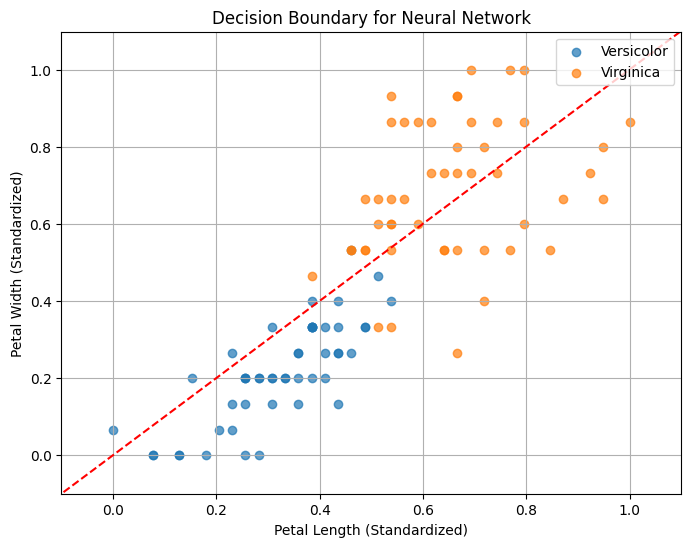


Decision Boundary at Iteration 10:


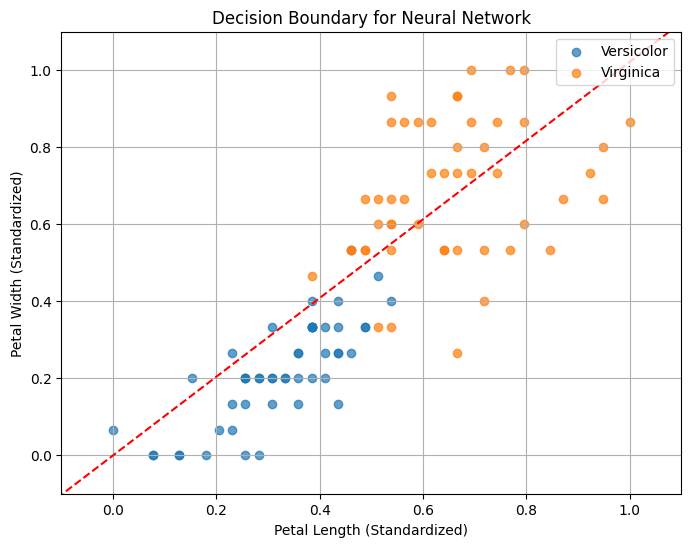


Decision Boundary at Iteration 50:


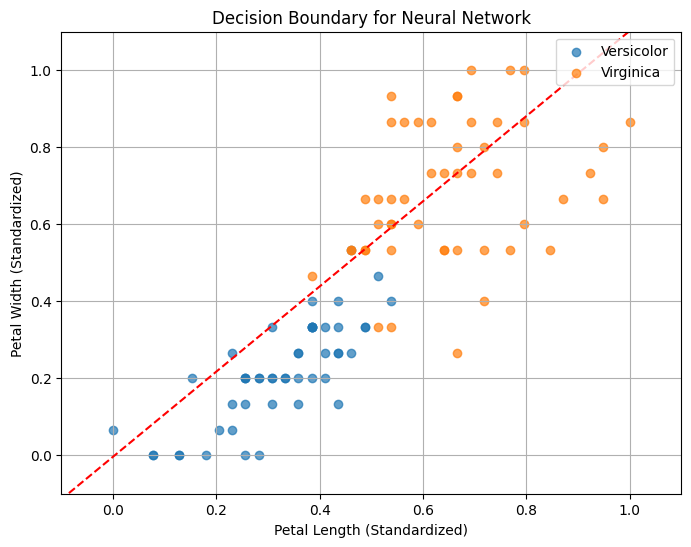


Decision Boundary After Optimization:


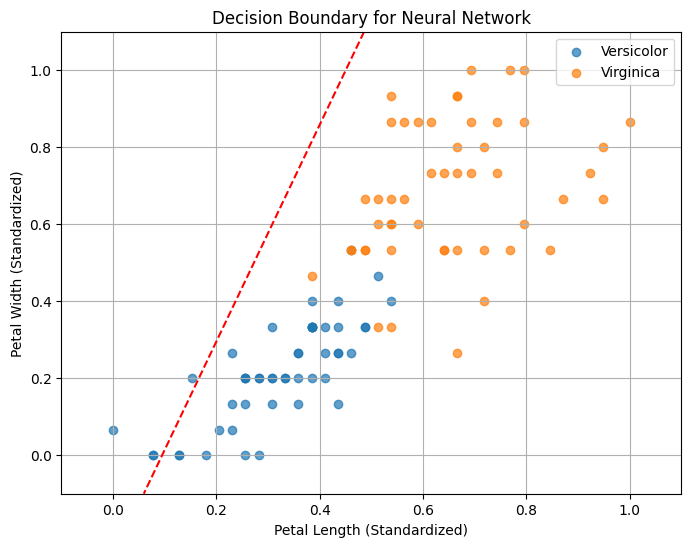

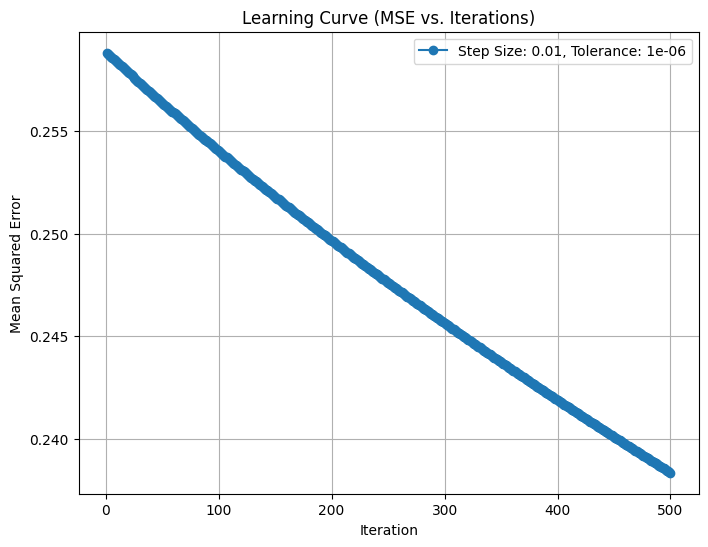


Running Gradient Descent with Step Size: 0.1, Tolerance: 0.0001

Decision Boundary Before Optimization:


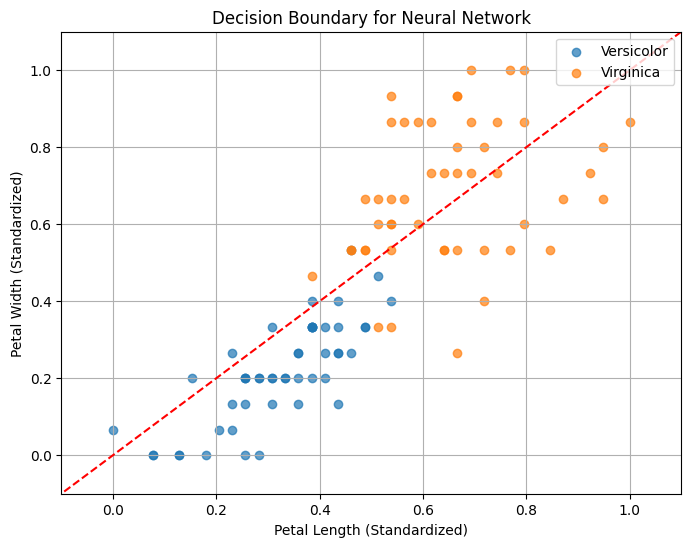


Decision Boundary at Iteration 0:


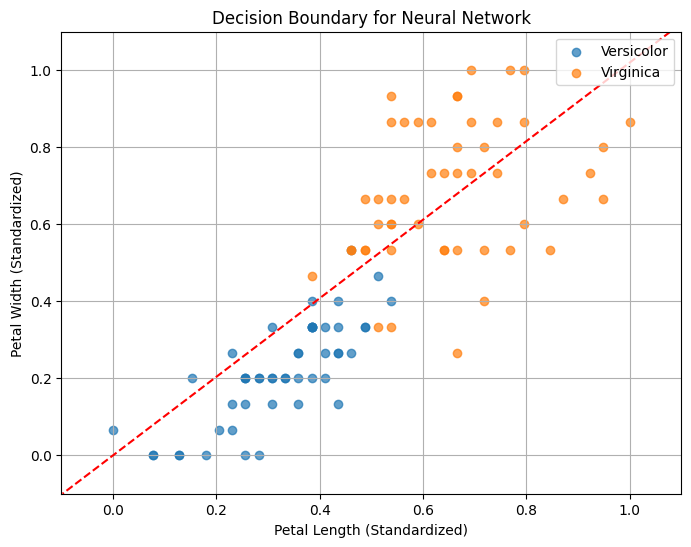


Decision Boundary at Iteration 10:


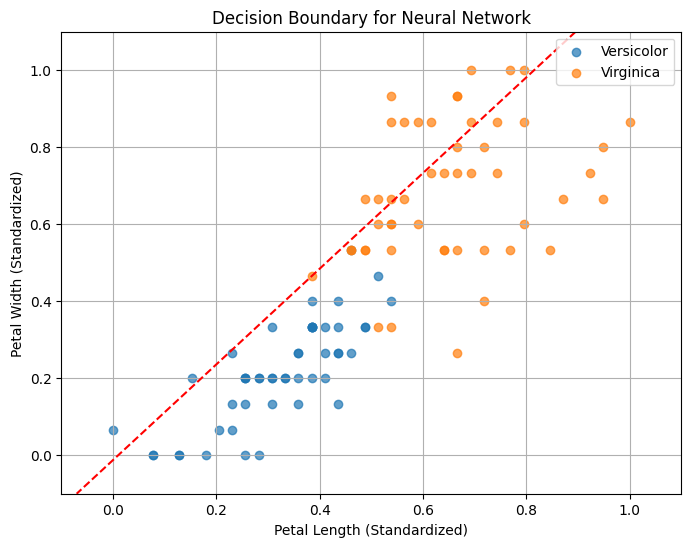


Decision Boundary at Iteration 50:


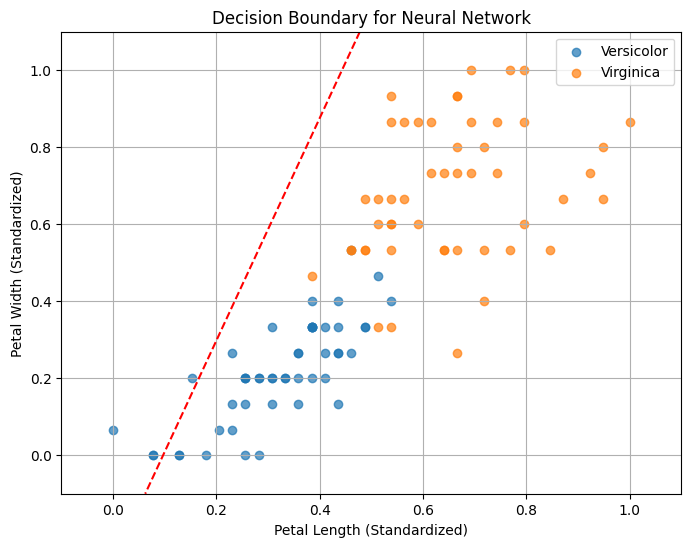


Decision Boundary After Optimization:


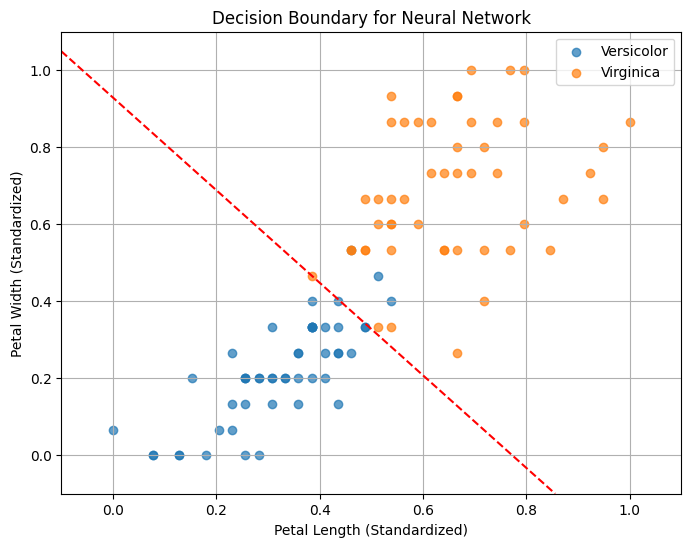

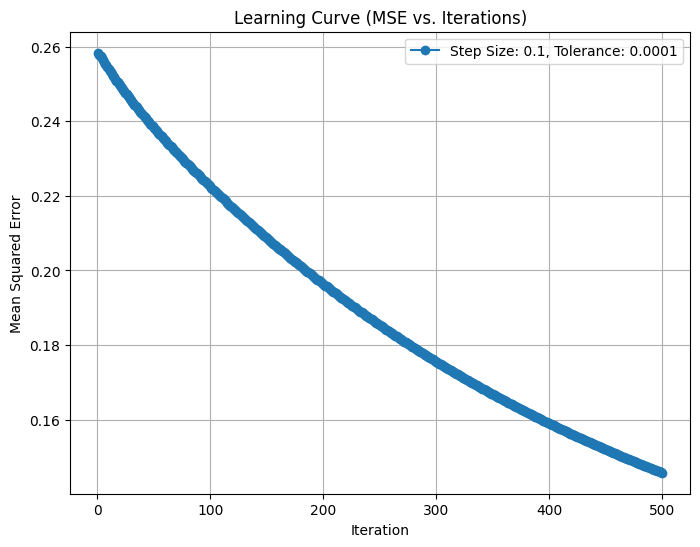


Running Gradient Descent with Step Size: 0.1, Tolerance: 1e-06

Decision Boundary Before Optimization:


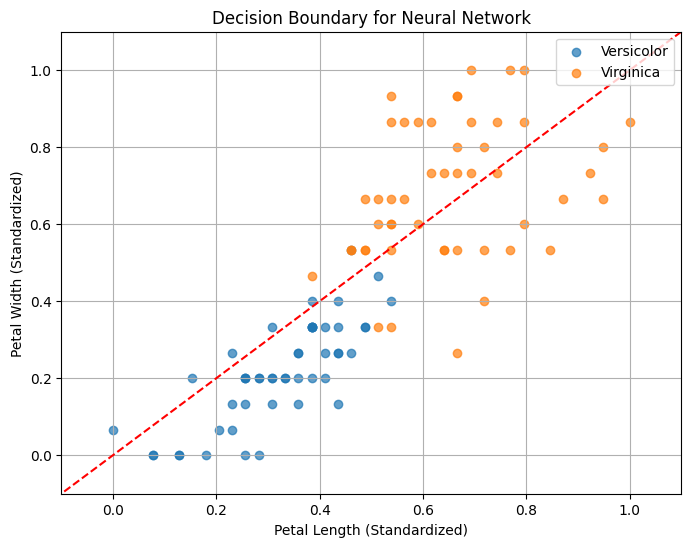


Decision Boundary at Iteration 0:


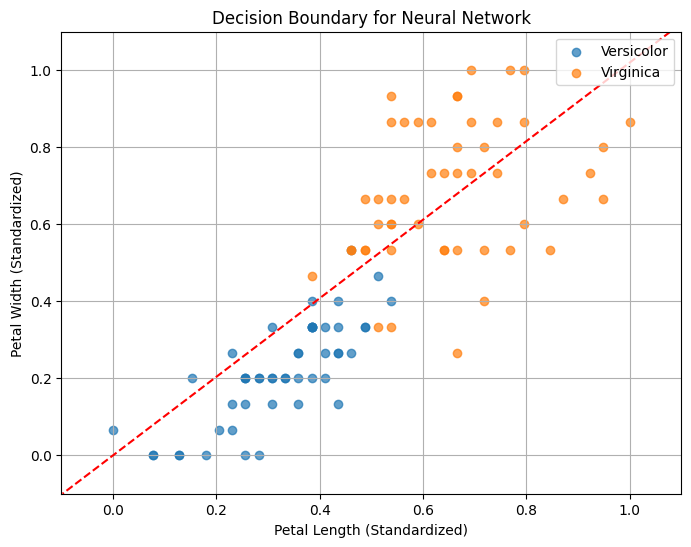


Decision Boundary at Iteration 10:


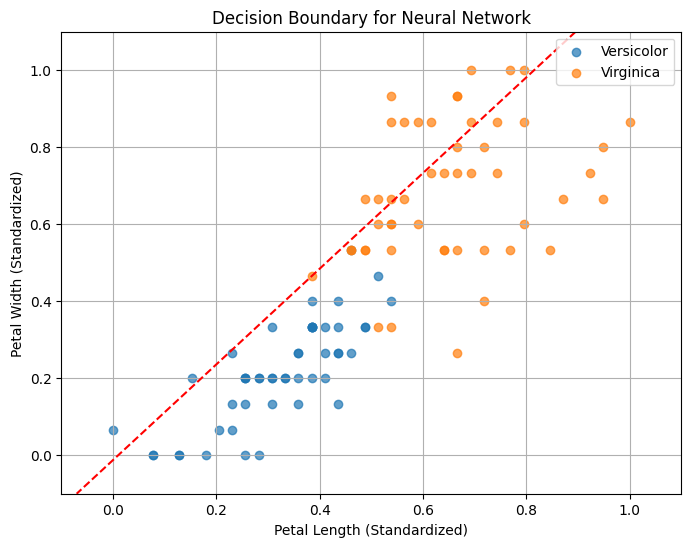


Decision Boundary at Iteration 50:


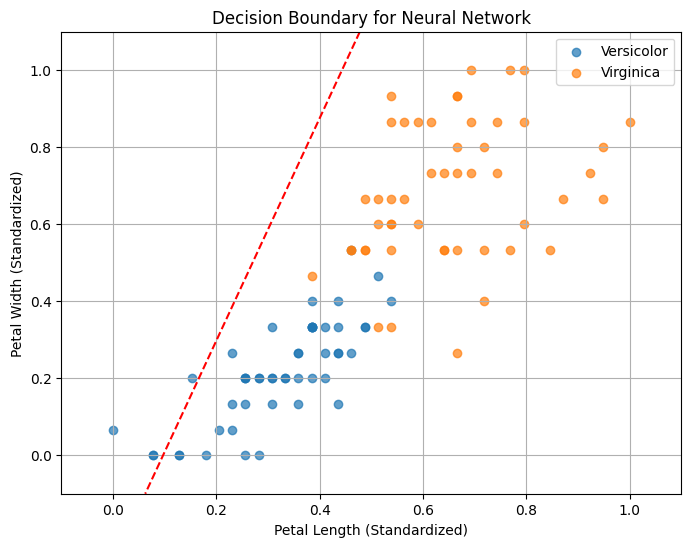


Decision Boundary After Optimization:


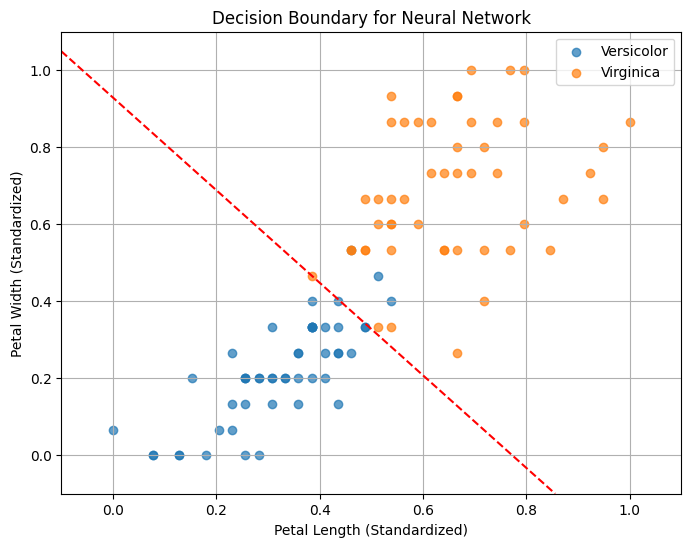

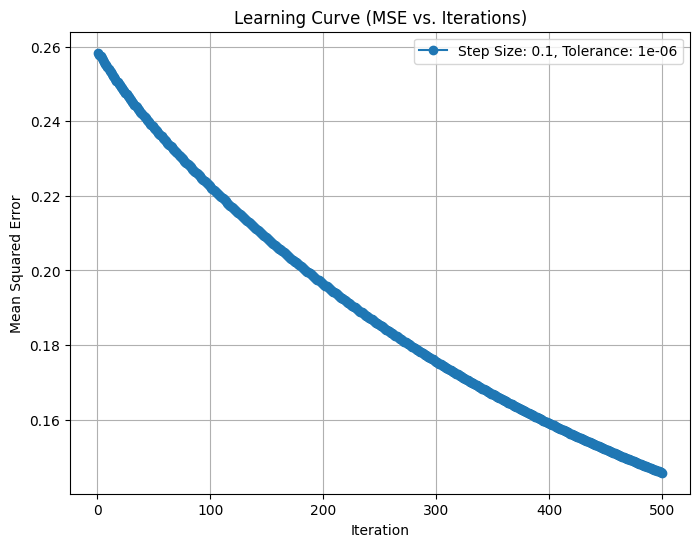


Running Gradient Descent with Step Size: 0.5, Tolerance: 0.0001

Decision Boundary Before Optimization:


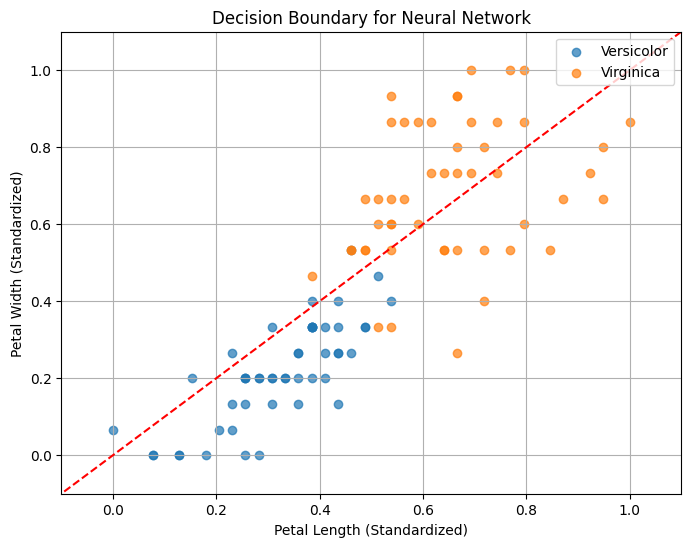


Decision Boundary at Iteration 0:


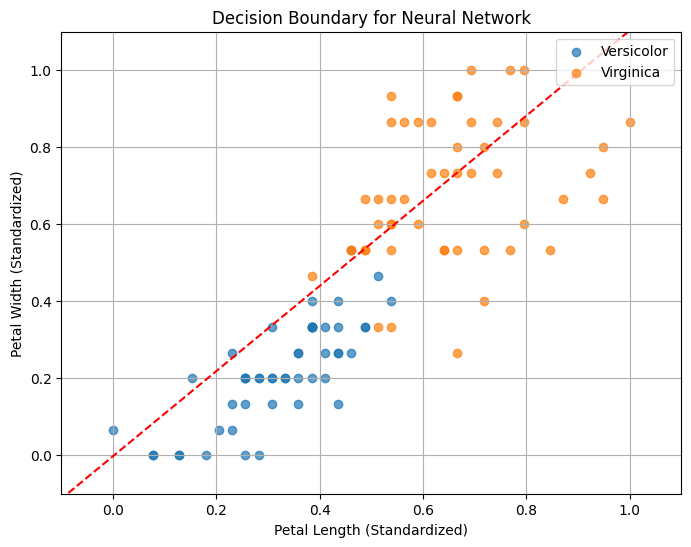


Decision Boundary at Iteration 10:


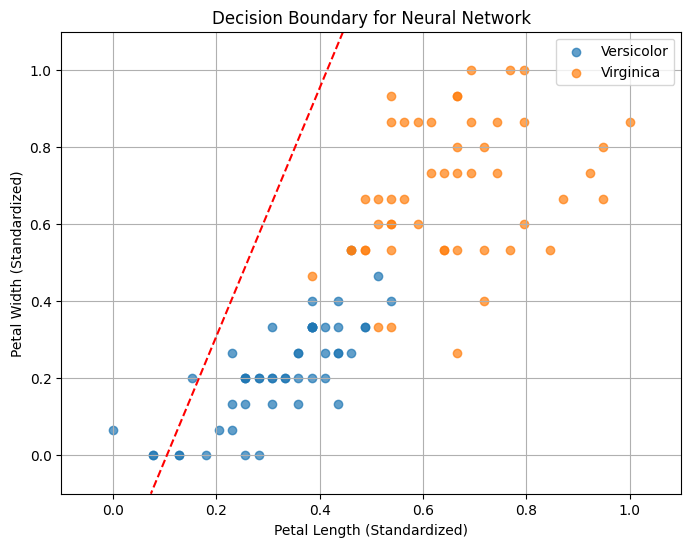


Decision Boundary at Iteration 50:


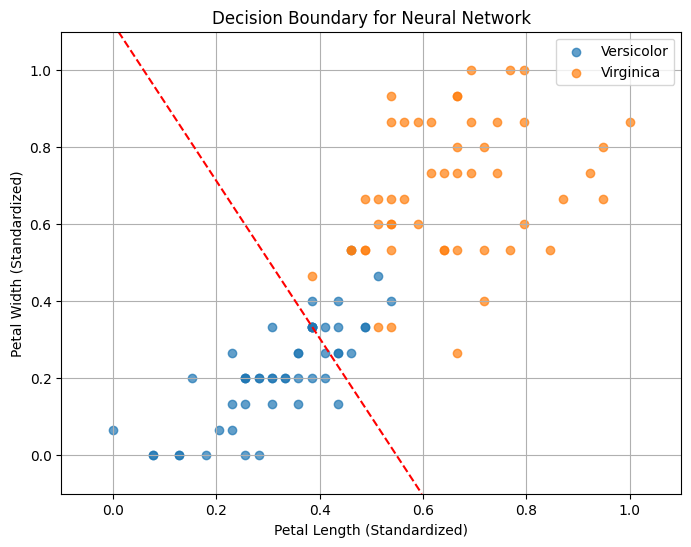


Decision Boundary After Optimization:


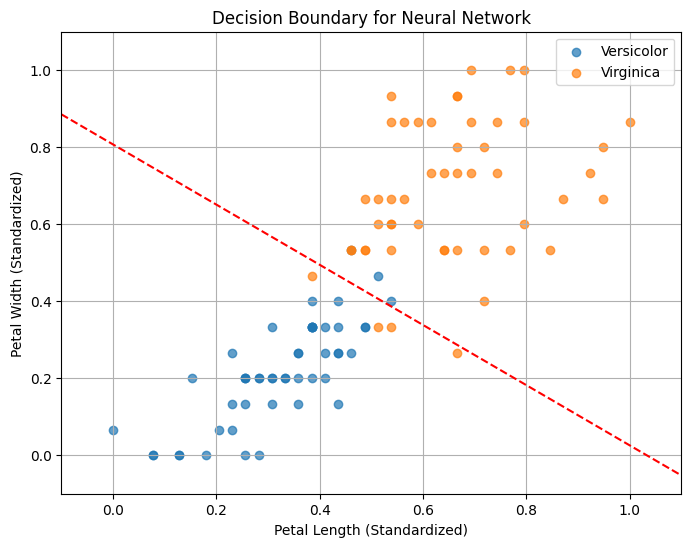

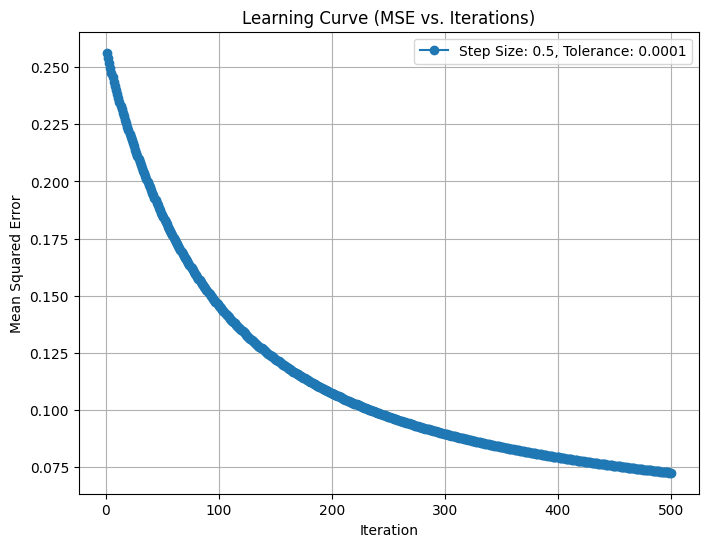


Running Gradient Descent with Step Size: 0.5, Tolerance: 1e-06

Decision Boundary Before Optimization:


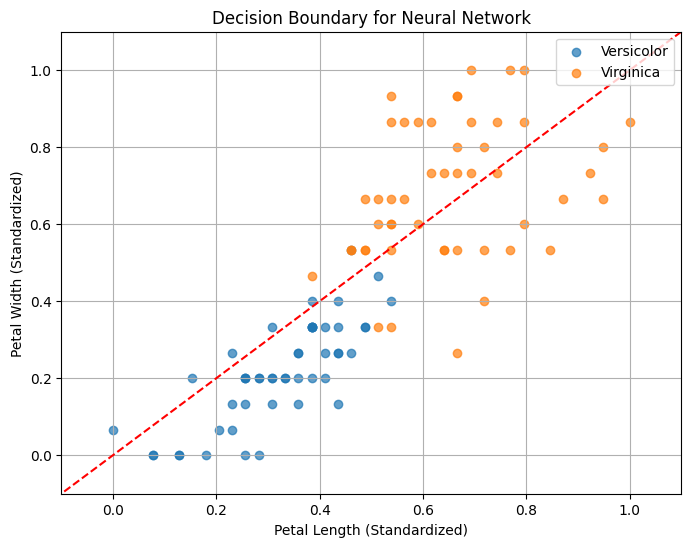


Decision Boundary at Iteration 0:


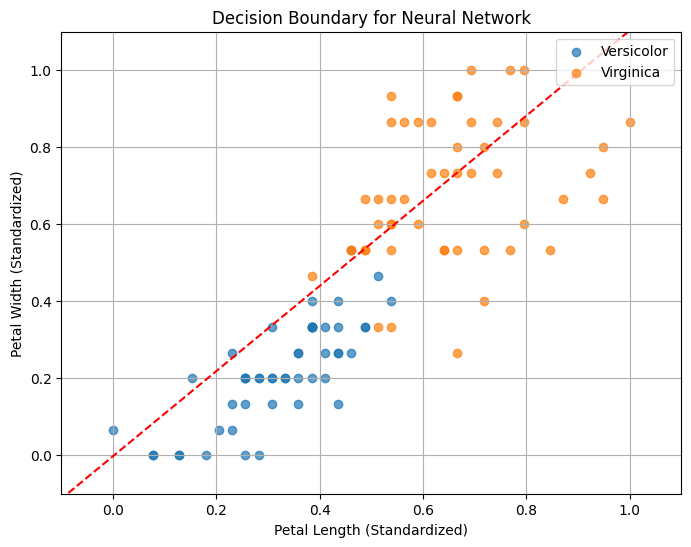


Decision Boundary at Iteration 10:


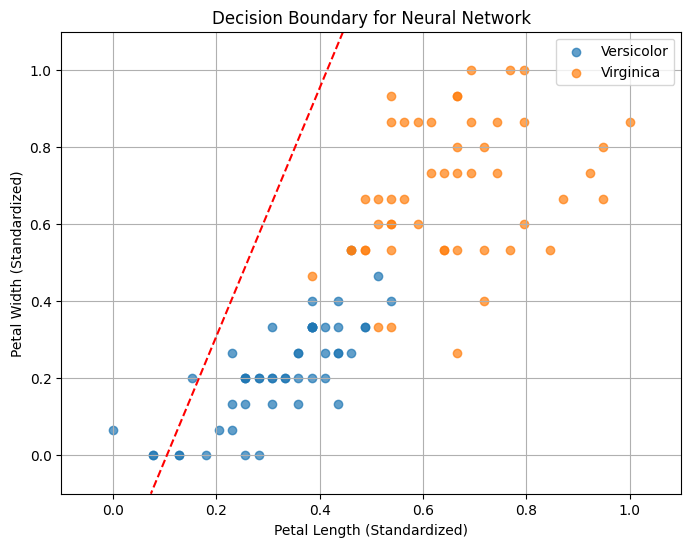


Decision Boundary at Iteration 50:


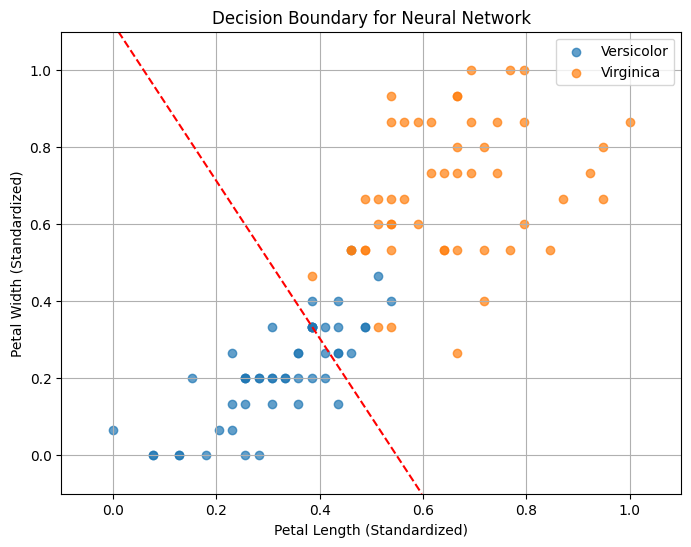


Decision Boundary After Optimization:


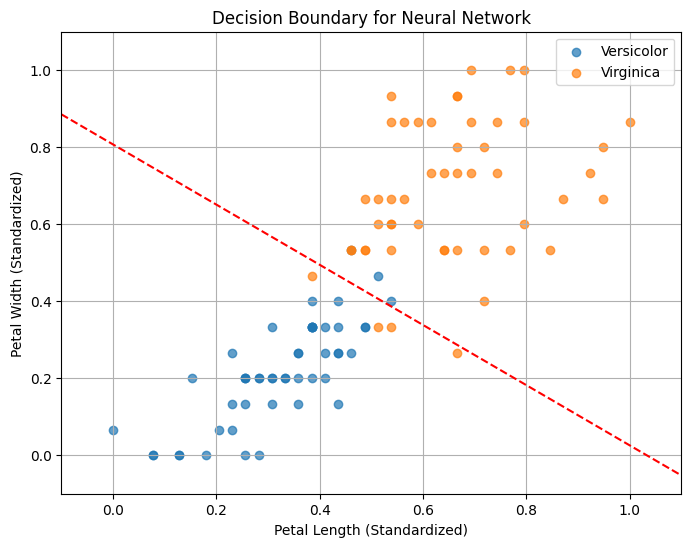

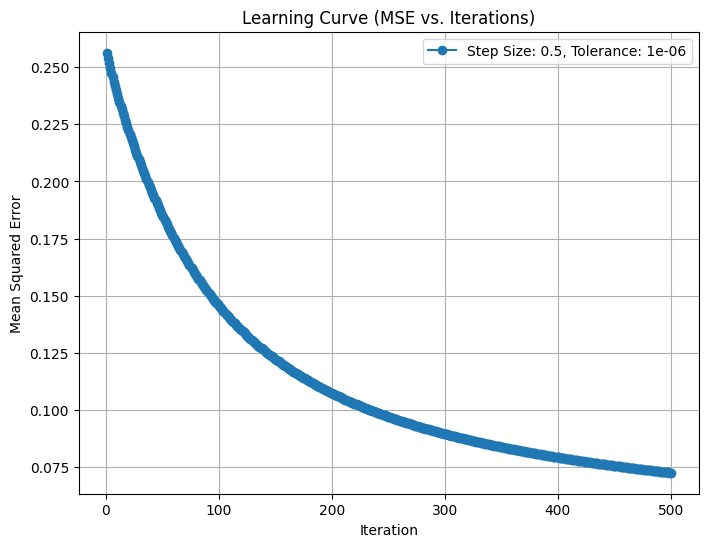

In [44]:
# Function to test different gradient descent settings
def experiment_gradient_descent(X, y, w_init, b_init, step_sizes, tolerances, max_iters):
    """
    Runs experiments with different step sizes, tolerances, and initializations.
    Plots learning curves and visualizes decision boundaries for each setting.

    Parameters:
    - X, y: Dataset (features and labels).
    - w_init, b_init: Initial weights and bias.
    - step_sizes: List of step sizes to test.
    - tolerances: List of stopping tolerances to test.
    - max_iters: Maximum iterations for gradient descent.

    Returns:
    - results: Dictionary of results for each setting.
    """
    results = {}  # Store results for analysis

    for step_size in step_sizes:
        for tolerance in tolerances:
            print(f"\nRunning Gradient Descent with Step Size: {step_size}, Tolerance: {tolerance}")
            
            # Run gradient descent
            optimized_w, optimized_b, mse_history = gradient_descent_with_visualization(
                X, y, w_init, b_init, step_size, max_iters, tolerance, visualize_steps=[0, 10, 50]
            )

            # Store results
            results[(step_size, tolerance)] = {
                'optimized_w': optimized_w,
                'optimized_b': optimized_b,
                'mse_history': mse_history
            }

            # Plot learning curve
            plt.figure(figsize=(8, 6))
            plt.plot(range(1, len(mse_history) + 1), mse_history, marker='o', linestyle='-',
                     label=f"Step Size: {step_size}, Tolerance: {tolerance}")
            plt.title('Learning Curve (MSE vs. Iterations)')
            plt.xlabel('Iteration')
            plt.ylabel('Mean Squared Error')
            plt.grid(True)
            plt.legend()
            plt.show()

    return results


# Experiment settings
step_sizes = [0.01, 0.1, 0.5]  # Small, moderate, and large learning rates
tolerances = [1e-4, 1e-6]      # Loose and strict stopping thresholds
max_iters = 500                # Maximum number of iterations

# Initial parameters
w_init = np.array([0.5, -0.5])  # Initial weights
b_init = 0.0                   # Initial bias

# Run experiments
results = experiment_gradient_descent(X, y, w_init, b_init, step_sizes, tolerances, max_iters)


## Excercise 3d


Initial Decision Boundary:


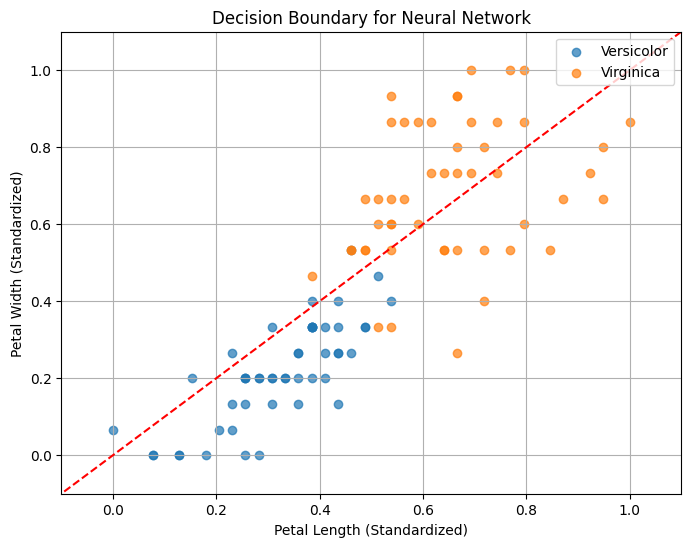


Decision Boundary When MSE is Halved (Iteration 661):


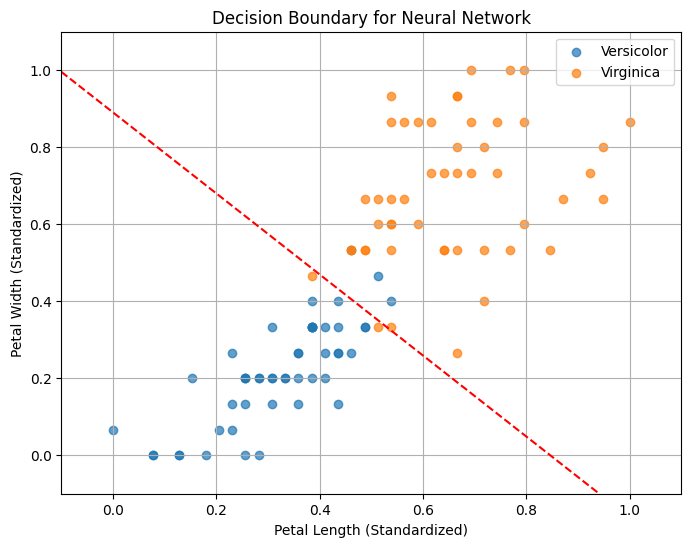


Final Decision Boundary:


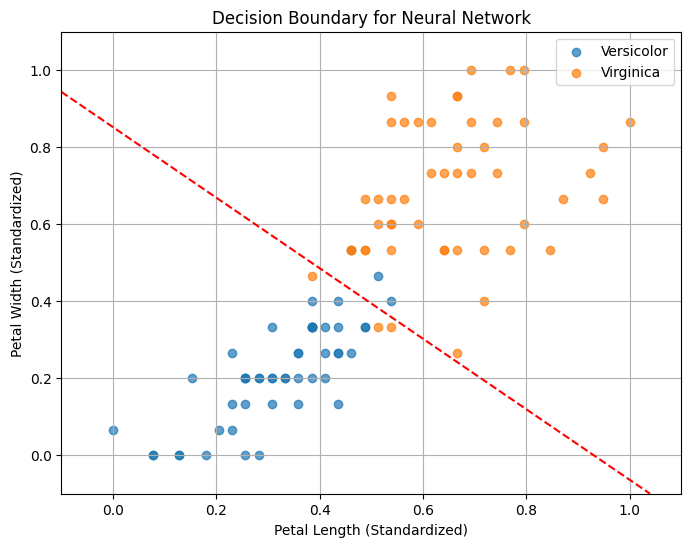

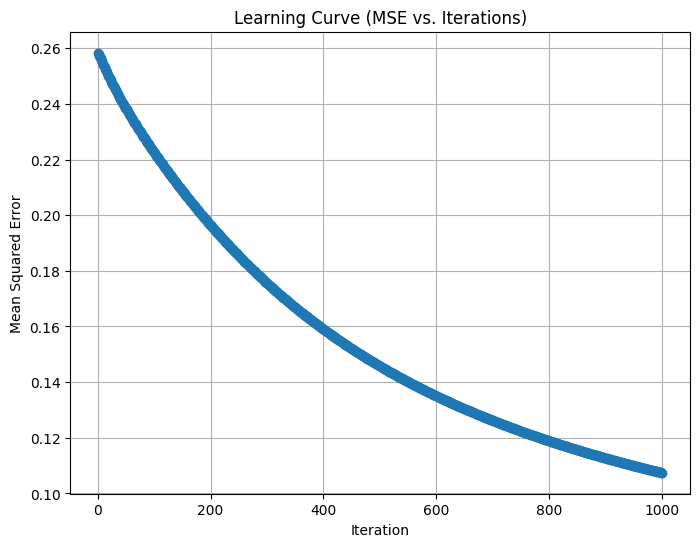

In [45]:
def gradient_descent_with_tracking(X, y, w_init, b_init, step_size, max_iters, tolerance):
    """
    Performs gradient descent while tracking and visualizing progress at specific stages.

    Parameters:
    - X: Feature matrix (numpy array of shape [n_samples, n_features]).
    - y: True labels (numpy array of shape [n_samples]).
    - w_init: Initial weights (numpy array of shape [n_features]).
    - b_init: Initial bias (scalar).
    - step_size: Learning rate (scalar).
    - max_iters: Maximum iterations for gradient descent.
    - tolerance: Stopping threshold for gradients (scalar).

    Returns:
    - w: Optimized weights (numpy array of shape [n_features]).
    - b: Optimized bias (scalar).
    - mse_history: List of MSE values at each iteration.
    """
    w = w_init
    b = b_init
    mse_history = []  # Track MSE over iterations

    # Compute the initial MSE
    initial_mse = compute_mse(X, w, b, y)
    mse_half_threshold = initial_mse / 2  # Threshold when MSE is halved

    print("\nInitial Decision Boundary:")
    plot_decision_boundary(X, y, w, b)

    for iteration in range(max_iters):
        # Compute gradients
        grad_w, grad_b = compute_gradients(X, y, w, b)
        
        # Update weights and bias
        w, b = update_parameters(w, b, grad_w, grad_b, step_size)
        
        # Compute current MSE
        mse = compute_mse(X, w, b, y)
        mse_history.append(mse)
        
        # Plot decision boundary when MSE is halved
        if len(mse_history) > 1 and mse_history[-2] >= mse_half_threshold > mse:
            print(f"\nDecision Boundary When MSE is Halved (Iteration {iteration}):")
            plot_decision_boundary(X, y, w, b)
        
        # Check stopping condition (gradient magnitude)
        grad_magnitude = np.linalg.norm(grad_w) + abs(grad_b)
        if grad_magnitude < tolerance:
            print(f"\nGradient descent converged at iteration {iteration}")
            break
    
    print("\nFinal Decision Boundary:")
    plot_decision_boundary(X, y, w, b)

    return w, b, mse_history


# Parameters
w_init = np.array([0.5, -0.5])  # Initial weights
b_init = 0.0                   # Initial bias
step_size = 0.1                # Chosen step size for smooth convergence
max_iters = 1000               # Maximum iterations
tolerance = 1e-6               # Stopping criterion for convergence

# Run gradient descent
optimized_w, optimized_b, mse_history = gradient_descent_with_tracking(
    X, y, w_init, b_init, step_size, max_iters, tolerance
)

# Plot the learning curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(mse_history) + 1), mse_history, marker='o', linestyle='-')
plt.title('Learning Curve (MSE vs. Iterations)')
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.show()
